In [2]:
import xarray as xr

# Elevation (level)

In [ ]:
el = xr.open_dataset(
    "../data/constituents_2min/GlobalTideElevation_DTU-TPXO8_2min_v1_UpperCase.nc"
)
el.sel(lon=slice(-0.5, 0.5), lat=slice(-0.5, 0.5)).to_netcdf(
    "../data/constituents_2min/GlobalTideElevation_DTU-TPXO8_2min_v1_UpperCase_test.nc"
)

In [29]:
el

<xarray.Dataset> Size: 6GB
Dimensions:        (time: 1, lon: 10801, lat: 5401)
Coordinates:
  * time           (time) float64 8B 1.502e+09
  * lon            (lon) float64 86kB -180.0 -180.0 -179.9 ... 179.9 180.0 180.0
  * lat            (lat) float64 43kB -90.0 -89.97 -89.93 ... 89.93 89.97 90.0
Data variables: (12/26)
    MM_amplitude   (time, lat, lon) float32 233MB ...
    MM_phase       (time, lat, lon) float32 233MB ...
    MF_amplitude   (time, lat, lon) float32 233MB ...
    MF_phase       (time, lat, lon) float32 233MB ...
    Q1_amplitude   (time, lat, lon) float32 233MB ...
    Q1_phase       (time, lat, lon) float32 233MB ...
    ...             ...
    MN4_amplitude  (time, lat, lon) float32 233MB ...
    MN4_phase      (time, lat, lon) float32 233MB ...
    M4_amplitude   (time, lat, lon) float32 233MB ...
    M4_phase       (time, lat, lon) float32 233MB ...
    MS4_amplitude  (time, lat, lon) float32 233MB ...
    MS4_phase      (time, lat, lon) float32 233MB ...
Attributes:
    Conventions:  CF-1.6

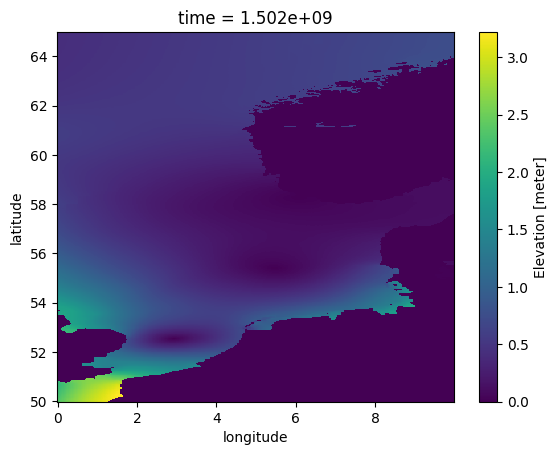

In [5]:
el.M2_amplitude.sel(lon=slice(0, 10), lat=slice(50, 65)).plot()

In [27]:
lat = 0
lon = 0

amps = {
    k.split("_")[0]: {"amplitude": v["data"]}
    for k, v in el.isel(time=0)
    .drop_vars("time")
    .sel(lon=lon, lat=lat, method="nearest")
    .to_dict()["data_vars"]
    .items()
    if k.endswith("amplitude")
}

phases = {
    k.split("_")[0]: {"phase": v["data"]}
    for k, v in el.isel(time=0)
    .drop_vars("time")
    .sel(lon=lon, lat=lat, method="nearest")
    .to_dict()["data_vars"]
    .items()
    if k.endswith("phase")
}

merged = {key: {**amps[key], **phases[key]} for key in amps.keys()}

merged


{'MM': {'amplitude': 0.009100000374019146, 'phase': 353.65869140625},
 'MF': {'amplitude': 0.017999999225139618, 'phase': 9.999999747378752e-05},
 'Q1': {'amplitude': 0.004999999888241291, 'phase': 126.8936996459961},
 'O1': {'amplitude': 0.015699999406933784, 'phase': 296.5531005859375},
 'P1': {'amplitude': 0.03099999949336052, 'phase': 345.0657958984375},
 'K1': {'amplitude': 0.10540000349283218, 'phase': 350.7146911621094},
 'N2': {'amplitude': 0.09749999642372131, 'phase': 100.06089782714844},
 'M2': {'amplitude': 0.44190001487731934, 'phase': 103.89859771728516},
 'S2': {'amplitude': 0.1559000015258789, 'phase': 131.38360595703125},
 'K2': {'amplitude': 0.04340000078082085, 'phase': 128.4779052734375},
 'MN4': {'amplitude': 0.0020000000949949026, 'phase': 269.9833068847656},
 'M4': {'amplitude': 0.00570000009611249, 'phase': 314.99169921875},
 'MS4': {'amplitude': 0.0010000000474974513, 'phase': 0.0006000000284984708}}

In [8]:
!ls ../data/constituents_2min/*.nc

../data/constituents_2min/GlobalTideCurrent_DTU-TPXO8_2min_v1.nc
../data/constituents_2min/GlobalTideElevation_DTU-TPXO8_2min_v1_UpperCase.nc


In [15]:
from pathlib import Path

path = Path("../data/constituents_2min/GlobalTideCurrent_DTU-TPXO8_2min_v1.nc")
path.exists()

True

In [57]:
ds = xr.open_dataset(path)

lat = 0
lon = 0
{
    k: v["data"]
    for k, v in ds.isel(t=0)
    .drop_vars("t")
    .sel(lon=lon, lat=lat, method="nearest")
    .to_dict()["data_vars"]
    .items()
}

{'Bathymetry': -4872.0009765625,
 'MM_major_axis': 9.01105158845894e-06,
 'MM_minor_axis': -1.9496008007990895e-06,
 'MM_inclination': 2.906916379928589,
 'MM_phase': 256.8228454589844,
 'MF_major_axis': 4.438337782630697e-05,
 'MF_minor_axis': 3.4023327089016675e-07,
 'MF_inclination': 165.6568145751953,
 'MF_phase': 76.47579193115234,
 'Q1_major_axis': 0.0002086554013658315,
 'Q1_minor_axis': -8.480727956339251e-06,
 'Q1_inclination': 142.22154235839844,
 'Q1_phase': 78.50479125976562,
 'O1_major_axis': 0.001069067046046257,
 'O1_minor_axis': -0.00021760926756542176,
 'O1_inclination': 158.36709594726562,
 'O1_phase': 88.95529174804688,
 'P1_major_axis': 0.0005761417560279369,
 'P1_minor_axis': -0.00014343175280373544,
 'P1_inclination': 1.3123918771743774,
 'P1_phase': 284.6610107421875,
 'K1_major_axis': 0.0018162211636081338,
 'K1_minor_axis': -0.00045589538058266044,
 'K1_inclination': 4.900940895080566,
 'K1_phase': 288.1497802734375,
 'N2_major_axis': 0.00324289221316576,
 'N2_

In [ ]:
ds

<xarray.Dataset> Size: 236B
Dimensions:          (t: 1)
Coordinates:
  * t                (t) float64 8B 1.502e+09
    lon              float64 8B -1.073e-05
    lat              float64 8B 1.475e-05
Data variables: (12/53)
    Bathymetry       (t) float32 4B ...
    MM_major_axis    (t) float32 4B ...
    MM_minor_axis    (t) float32 4B ...
    MM_inclination   (t) float32 4B ...
    MM_phase         (t) float32 4B ...
    MF_major_axis    (t) float32 4B ...
    ...               ...
    M4_inclination   (t) float32 4B ...
    M4_phase         (t) float32 4B ...
    MS4_major_axis   (t) float32 4B ...
    MS4_minor_axis   (t) float32 4B ...
    MS4_inclination  (t) float32 4B ...
    MS4_phase        (t) float32 4B ...
Attributes:
    _FillValue:   -1e-30
    Conventions:  CF-1.6